<a href="https://colab.research.google.com/github/PabloAguirrer2041/Actividades/blob/main/AF7_RNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerías cargadas.
Versión de TensorFlow: 2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Forma de los datos de entrenamiento: (60000, 28, 28)
Cantidad de etiquetas de entrenamiento: 60000
Forma de los datos de prueba: (10000, 28, 28)
Cantidad de etiquetas de prueba: 10000
Ejemplo de etiqueta (train_labels[0]): 5

Datos normalizados (escalados de 0 a 1).

--- Resumen del Modelo ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "Mi_Red_Neuronal_FNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)


--- Iniciando Entrenamiento ---
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8643 - loss: 0.4760 - val_accuracy: 0.9513 - val_loss: 0.1510
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9658 - loss: 0.1172 - val_accuracy: 0.9657 - val_loss: 0.1154
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9744 - loss: 0.0828 - val_accuracy: 0.9712 - val_loss: 0.0979
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9826 - loss: 0.0549 - val_accuracy: 0.9672 - val_loss: 0.1161
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9860 - loss: 0.0446 - val_accuracy: 0.9703 - val_loss: 0.1069
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9903 - loss: 0.0317 - val_accuracy: 0.9743 - val_loss: 0.0976
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9740 - val_loss: 0.0952
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - a

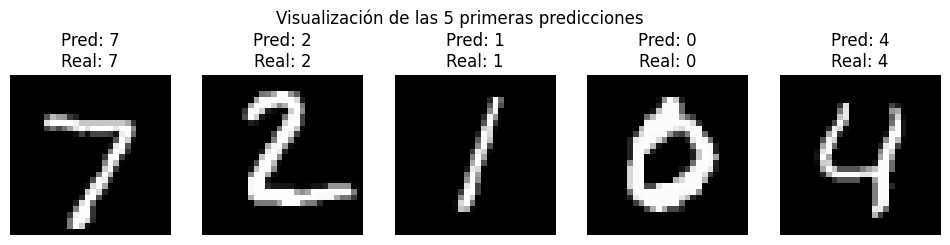

In [1]:
# ------------------------------------------------------------------
# AF7-Redes Neuronales Artificiales-Pablo Fernando Aguirre Ramírez, 2041998, N4
# ------------------------------------------------------------------


# ==================================================================
# 1. CARGAR LIBRERÍAS
# ==================================================================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print("Librerías cargadas.")
print(f"Versión de TensorFlow: {tf.__version__}")


# ==================================================================
# 2. CARGAR DATOS
# ==================================================================
# Cargamos el conjunto de datos MNIST desde Keras.
# La función load_data() ya nos da los conjuntos de entrenamiento y prueba.
(train_data, train_labels), (test_data, test_label) = keras.datasets.mnist.load_data()

# Inspeccionamos los datos
print(f"\nForma de los datos de entrenamiento: {train_data.shape}")
print(f"Cantidad de etiquetas de entrenamiento: {len(train_labels)}")
print(f"Forma de los datos de prueba: {test_data.shape}")
print(f"Cantidad de etiquetas de prueba: {len(test_label)}")

# Vemos una etiqueta de ejemplo
print(f"Ejemplo de etiqueta (train_labels[0]): {train_labels[0]}")


# ==================================================================
# 3. PREPROCESAMIENTO DE DATOS
# ==================================================================
# Las imágenes son matrices de 28x28 píxeles con valores de 0 a 255.
# Debemos "normalizar" estos valores a un rango de 0 a 1 para
# que la red neuronal funcione mejor.

train_data = train_data.astype("float32") / 255.0
test_data = test_data.astype("float32") / 255.0

# Las etiquetas (train_labels, test_label) ya están como enteros (0-9).
# Esto es perfecto para usarse con la función de pérdida
# 'sparse_categorical_crossentropy', así que no necesitamos
# convertirlas a one-hot encoding.

print("\nDatos normalizados (escalados de 0 a 1).")


# ==================================================================
# 4. SELECCIÓN Y ENTRENAMIENTO DEL MODELO
# ==================================================================

# --- 4.1. Definición de la estructura del modelo ---
# Proponemos una Red Neuronal Prealimentada (Feedforward) secuencial.

model = keras.Sequential(name="Mi_Red_Neuronal_FNN")

# Capa 1: Capa de Aplanamiento (Flatten)
# Convierte las imágenes de 28x28 en un vector de 784 elementos.
model.add(layers.Flatten(input_shape=(28, 28)))

# Capa 2: Capa Oculta Densa
# 128 neuronas con función de activación ReLU.
model.add(layers.Dense(128, activation="relu"))

# Capa 3: Capa Oculta Densa
# 64 neuronas con función de activación ReLU.
model.add(layers.Dense(64, activation="relu"))

# Capa 4: Capa de Salida
# 10 neuronas (una para cada dígito, 0-9).
# Función de activación Softmax (como se solicitó).
# Softmax nos dará la probabilidad de que la imagen pertenezca a cada clase.
model.add(layers.Dense(10, activation="softmax"))

# --- 4.2. Compilación del modelo ---
# Aquí establecemos el optimizador, la función de pérdida y la métrica.
model.compile(
    optimizer="adam",  # Un optimizador eficiente y popular
    loss="sparse_categorical_crossentropy", # Ideal para etiquetas enteras (0, 1, 2...)
    metrics=["accuracy"] # Métrica solicitada
)

# Mostramos un resumen de la arquitectura de nuestra red
print("\n--- Resumen del Modelo ---")
model.summary()


# --- 4.3. Entrenamiento del modelo ---
# Usamos la función 'fit' de Keras.
print("\n--- Iniciando Entrenamiento ---")
history = model.fit(
    train_data,          # Datos de entrenamiento
    train_labels,        # Etiquetas de entrenamiento
    epochs=10,             # Número de veces que el modelo verá todo el dataset
    validation_split=0.2 # Usamos un 20% de los datos de ent. para validación
)
print("--- Entrenamiento Finalizado ---")


# ==================================================================
# 5. PRUEBA DEL MODELO
# ==================================================================

# --- 5.1. Evaluación con el conjunto de prueba ---
# Usamos la función 'evaluate' con los datos de prueba.
print("\n--- Evaluación del Modelo con Datos de Prueba ---")
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)
print(f"\nExactitud (accuracy) en el conjunto de prueba: {test_acc * 100:.2f}%")
print(f"Pérdida (loss) en el conjunto de prueba: {test_loss:.4f}")


# --- 5.2. Realización de 5 predicciones ---
print("\n--- 5 Predicciones de Ejemplo ---")

# Obtenemos las predicciones para todo el conjunto de prueba
# 'predictions' será un array con las 10 probabilidades de softmax para cada imagen
predictions_softmax = model.predict(test_data)

# Para obtener el dígito predicho, buscamos el índice (0-9)
# con la probabilidad más alta usando np.argmax
predictions = np.argmax(predictions_softmax, axis=1)

# Mostramos las primeras 5 predicciones vs el valor real
for i in range(5):
    print(f"Imagen #{i}: Predicción = {predictions[i]}, Valor Real = {test_label[i]}")

# --- (Opcional) Visualización de las 5 predicciones ---
plt.figure(figsize=(12, 3))
plt.suptitle("Visualización de las 5 primeras predicciones")
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_data[i], cmap='gray')
    plt.title(f"Pred: {predictions[i]}\nReal: {test_label[i]}")
    plt.axis('off')
plt.show()